# Employee Prediction Model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import  LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB

In [3]:
df = pd.read_csv('HR_comma_sep.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


## Exploratory Data Analysis (EDA)

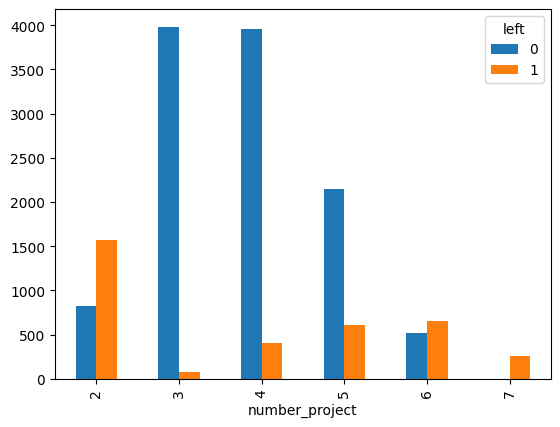

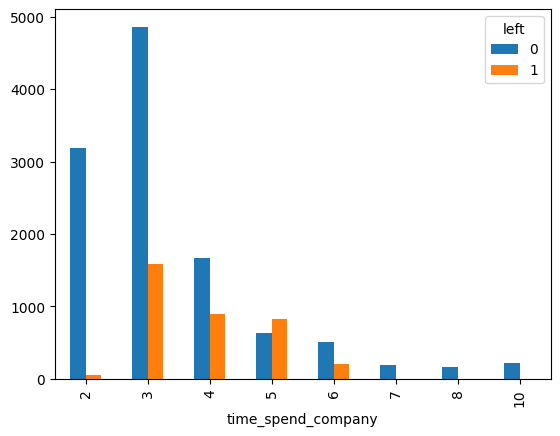

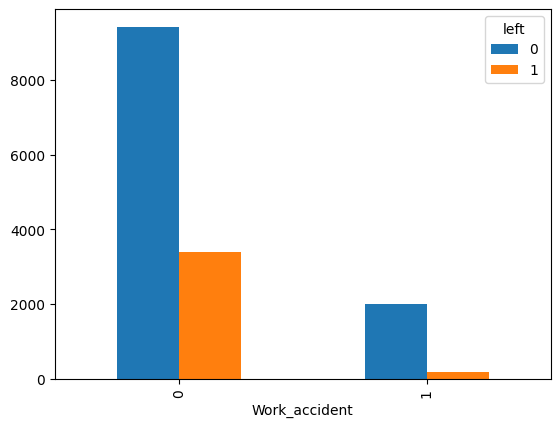

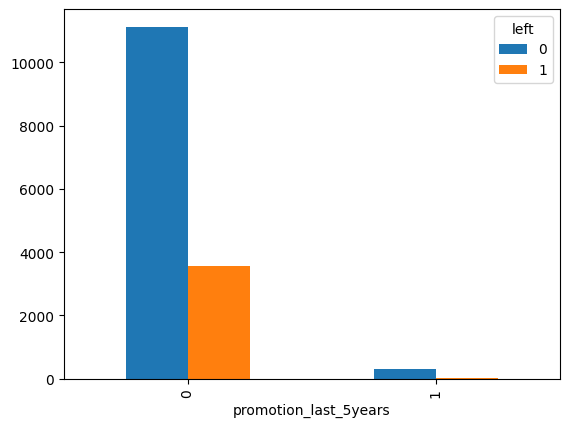

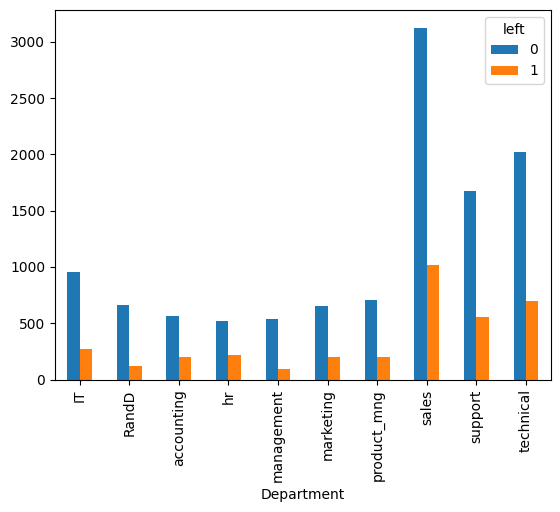

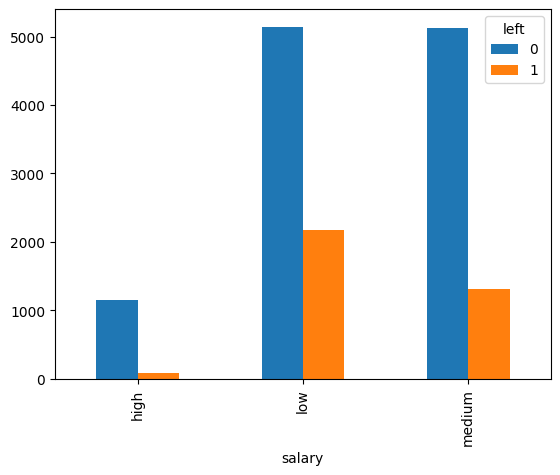

In [4]:
for i in ['number_project','time_spend_company','Work_accident','promotion_last_5years','Department','salary']:
    pd.crosstab(df[i],df.left).plot(kind='bar')

In [5]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
df_x = df[['Work_accident','promotion_last_5years','salary']]
df_y = df['left']

In [7]:
print(df_x['Work_accident'].value_counts())
print(df_x['promotion_last_5years'].value_counts())
print(df_x['salary'].value_counts())

Work_accident
0    12830
1     2169
Name: count, dtype: int64
promotion_last_5years
0    14680
1      319
Name: count, dtype: int64
salary
low       7316
medium    6446
high      1237
Name: count, dtype: int64


In [8]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
salary_arr = ohe.fit_transform(df_x[['salary']]).toarray()
salary_col = ohe.get_feature_names_out()
salary_col
salary_df = pd.DataFrame(salary_arr,columns=salary_col)
salary_df
df_x = pd.concat([df_x,salary_df],axis=1)
df_x.drop('salary',axis=1,inplace=True)
df_x

,Work_accident,promotion_last_5years,salary_high,salary_low,salary_medium
0,0,0,0.0,1.0,0.0
1,0,0,0.0,0.0,1.0
2,0,0,0.0,0.0,1.0
3,0,0,0.0,1.0,0.0
4,0,0,0.0,1.0,0.0
...,...,...,...,...,...
14994,0,0,0.0,1.0,0.0
14995,0,0,0.0,1.0,0.0
14996,0,0,0.0,1.0,0.0
14997,0,0,0.0,1.0,0.0


In [9]:
df_y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_x,df_y,test_size=0.1)

In [11]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [12]:
y_predict = model.predict(x_test)
y_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [13]:
model.score(x_test,y_test)

0.7706666666666667